In [1]:
# Import necessary libraries
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.svm import SVC
from scipy import stats


In [2]:
# Load training and testing data
train=pd.read_csv('titanic.csv')
test=pd.read_csv('test.csv')
test = test.rename(columns={'sibSp': 'sibsp'})
train["age"]=np.round(train["age"])
test["age"]=np.round(test["age"])


In [3]:
#check for outliers in training data
numericals = train[['age', 'fare']]
z_scores = np.abs(stats.zscore(numericals))
outliers = numericals[(z_scores > 2).any(axis=1)] 
if outliers.empty:
    print("no outliers in train data")
else:
    print("Outliers (train) using z-score:")
    print(outliers)



no outliers in train data


In [4]:
# Check for missing values in the training dataset
missing_values = train.isnull().sum()
missing_percentage = (missing_values / len(train)) * 100
missing_data_info = pd.DataFrame({'Missing_Values': missing_values, 'Missing_Percentage': missing_percentage})
missing_data_info = missing_data_info.sort_values(by='Missing_Percentage', ascending=False)
print("Columns with the highest percentage of missing values(train):")
print(missing_data_info.head())

# Check for missing values in the test dataset
missing_values = test.isnull().sum()
missing_percentage = (missing_values / len(test)) * 100
missing_data_info = pd.DataFrame({'Missing_Values': missing_values, 'Missing_Percentage': missing_percentage})
missing_data_info = missing_data_info.sort_values(by='Missing_Percentage', ascending=False)
print("Columns with the highest percentage of missing values(test):")
print(missing_data_info.head())

Columns with the highest percentage of missing values(train):
          Missing_Values  Missing_Percentage
cabin               1014           77.463713
age                  263           20.091673
embarked               2            0.152788
fare                   1            0.076394
pclass                 0            0.000000
Columns with the highest percentage of missing values(test):
        Missing_Values  Missing_Percentage
cabin               17           89.473684
age                  1            5.263158
pclass               0            0.000000
name                 0            0.000000
sex                  0            0.000000


In [5]:
# Fill missing values in numerical columns with median and categorical columns with mode
numerical_cols = train.select_dtypes(include=[np.number]).columns
train[numerical_cols] = train[numerical_cols].fillna(train[numerical_cols].median())
categorical_cols = train.select_dtypes(exclude=[np.number]).columns
train[categorical_cols] = train[categorical_cols].fillna(train[categorical_cols].mode().iloc[0])
numerical_cols2 = test.select_dtypes(include=[np.number]).columns
test[numerical_cols2] = test[numerical_cols2].fillna(test[numerical_cols2].median())
categorical_cols2 = test.select_dtypes(exclude=[np.number]).columns
test[categorical_cols2] = test[categorical_cols2].fillna(test[categorical_cols2].mode().iloc[0])

In [6]:
# Recheck for missing values in the datasets
missing_values = train.isnull().sum()
missing_percentage = (missing_values / len(train)) * 100
missing_data_info = pd.DataFrame({'Missing_Values': missing_values, 'Missing_Percentage': missing_percentage})
missing_data_info = missing_data_info.sort_values(by='Missing_Percentage', ascending=False)
print("Columns with the highest percentage of missing values(train):")
print(missing_data_info.head())

missing_values = test.isnull().sum()
missing_percentage = (missing_values / len(test)) * 100
missing_data_info = pd.DataFrame({'Missing_Values': missing_values, 'Missing_Percentage': missing_percentage})
missing_data_info = missing_data_info.sort_values(by='Missing_Percentage', ascending=False)
print("Columns with the highest percentage of missing values(test):")
print(missing_data_info.head())

Columns with the highest percentage of missing values(train):
        Missing_Values  Missing_Percentage
pclass               0                 0.0
name                 0                 0.0
sex                  0                 0.0
age                  0                 0.0
sibsp                0                 0.0
Columns with the highest percentage of missing values(test):
        Missing_Values  Missing_Percentage
pclass               0                 0.0
name                 0                 0.0
sex                  0                 0.0
age                  0                 0.0
sibsp                0                 0.0


In [7]:
# Perform statistical analysis
print('Descriptive Statistics for Train Dataset','\n', train.describe())
print('\n','Median=', train[numerical_cols].median(), '\n', 'Mode=', train.mode().iloc[0], '\n')

print('Descriptive Statistics for Test Dataset','\n', test.describe())
print('\n','Median=', test[numerical_cols2].median(), '\n', 'Mode=', test.mode().iloc[0], '\n')

Descriptive Statistics for Train Dataset 
             pclass          age        sibsp        parch         fare  \
count  1309.000000  1309.000000  1309.000000  1309.000000  1309.000000   
mean      2.294882    29.495034     0.498854     0.385027    33.281086   
std       0.837836    12.903287     1.041658     0.865560    51.741500   
min       1.000000     0.000000     0.000000     0.000000     0.000000   
25%       2.000000    22.000000     0.000000     0.000000     7.895800   
50%       3.000000    28.000000     0.000000     0.000000    14.454200   
75%       3.000000    35.000000     1.000000     0.000000    31.275000   
max       3.000000    80.000000     8.000000     9.000000   512.329200   

          survived  
count  1309.000000  
mean      0.381971  
std       0.486055  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       1.000000  
max       1.000000  

 Median= pclass       3.0000
age         28.0000
sibsp        0.0000
parch        0.0000
fare       

survived    1.000000
fare        0.244414
parch       0.082660
sibsp      -0.027825
age        -0.043338
pclass     -0.312469
Name: survived, dtype: float64


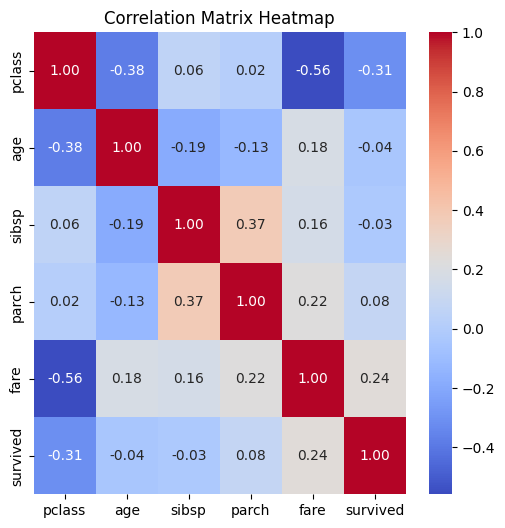

In [8]:
#calculate collerations between attributes and visualize it
correlation_matrix = train.select_dtypes(include=[np.number]).corr()
correlation_with_survived = correlation_matrix['survived'].sort_values(ascending=False)
print(correlation_with_survived)
plt.figure(figsize=(6, 6))
sns.heatmap(correlation_matrix,fmt='.2f',annot=True,cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

In [9]:
#determine highly collerated variables with target
highly_correlated_features = correlation_with_survived[abs(correlation_with_survived) > 0.5].index

if(highly_correlated_features=="survived"):
    print("no highly colleracted features")
else:
    print("Features highly correlated with 'survived':")
    print(highly_correlated_features)

no highly colleracted features


survived
0    809
1    500
Name: count, dtype: int64


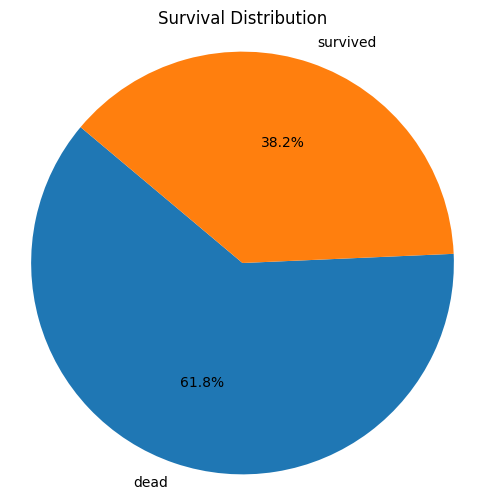

In [10]:
#visualize survival distribution
survived_counts = train['survived'].value_counts()
print(survived_counts)
labels=["dead", "survived"]
# Plotting a pie chart
plt.figure(figsize=(6, 6))
plt.pie(survived_counts, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Survival Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

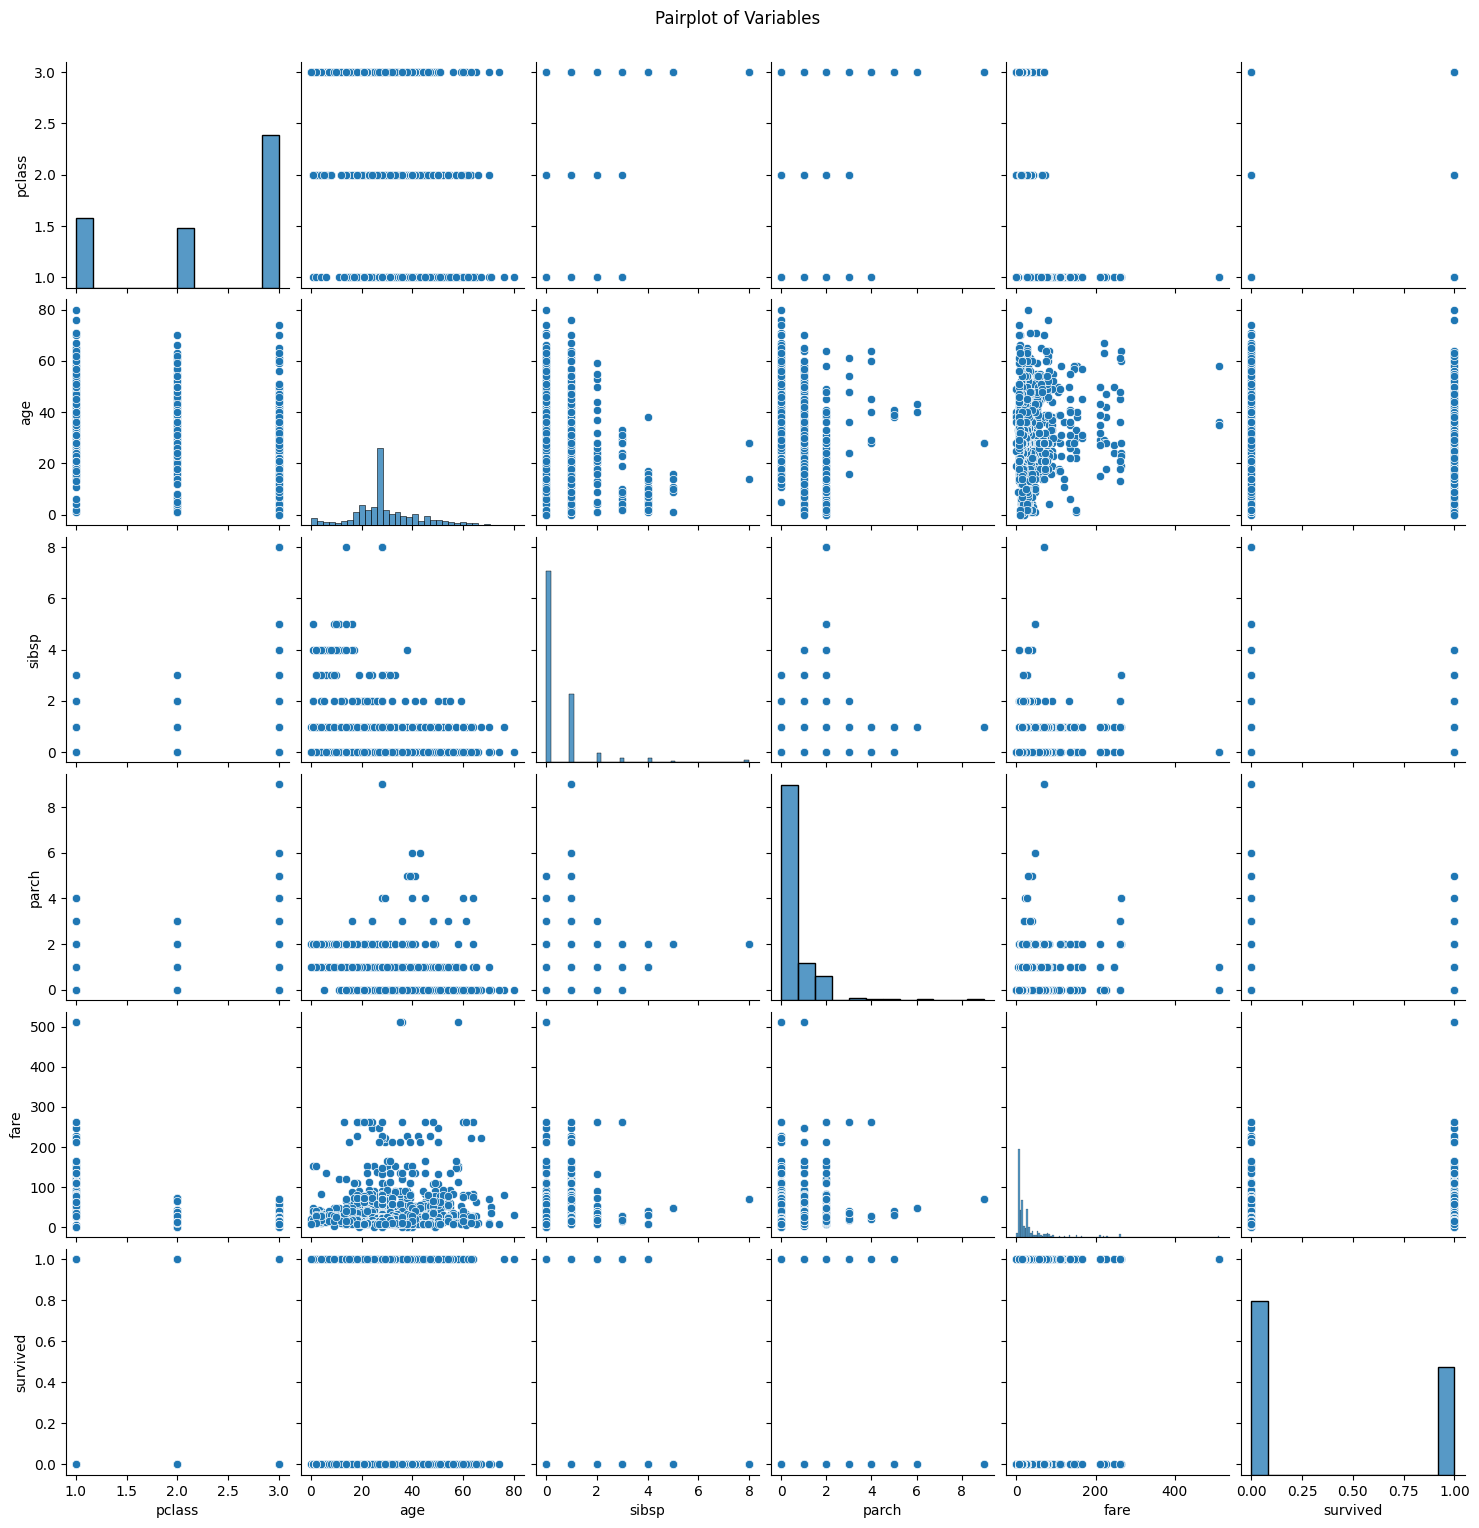

In [11]:
#pairplot of data variables
sns.pairplot(train)
plt.suptitle('Pairplot of Variables', y=1.02)
plt.show()

In [12]:
#encode and scale data
combined_values=pd.concat([train, test], axis=0,ignore_index=True)
categorical_columns = combined_values.select_dtypes(exclude=[np.number]).columns
numerical_columns = combined_values.select_dtypes(include=[np.number]).columns
encoder = OneHotEncoder(drop='first', sparse=False)
encoded_data = encoder.fit_transform(combined_values[categorical_columns])
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_columns))
data_encoded = pd.concat([combined_values[numerical_columns], encoded_df], axis=1)

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data_encoded)
combined_values_scaled_df = pd.DataFrame(scaled_data, columns=data_encoded.columns)



scaled_df=combined_values_scaled_df.iloc[:len(train)]
test_scaled_df = combined_values_scaled_df.iloc[len(train):]
scaled_df = scaled_df.reset_index(drop=True)
test_scaled_df = test_scaled_df.reset_index(drop=True).drop(columns=['survived'])

c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [13]:
# Split data into train and test sets for model evaluation
x = scaled_df.drop('survived', axis=1)
y = scaled_df['survived']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4,random_state=42)

KNN Model Accuracy Score: 0.7748
KNN Training-set accuracy score: 0.8650
No overfitting occured
Best k: 18
Accuracy: 0.7805343511450382
Precision: 0.7982712168837001
Recall: 0.7805343511450382
F1-score: 0.7682740862617543


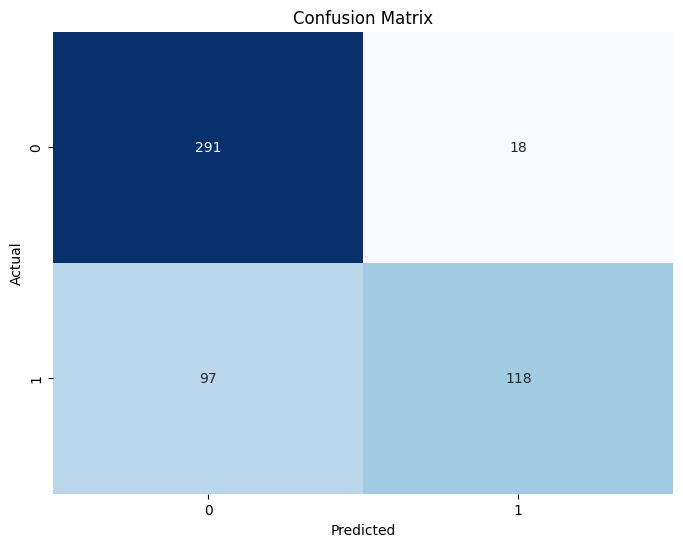

              precision    recall  f1-score   support

         0.0       0.75      0.94      0.84       309
         1.0       0.87      0.55      0.67       215

    accuracy                           0.78       524
   macro avg       0.81      0.75      0.75       524
weighted avg       0.80      0.78      0.77       524

[0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0.]


In [14]:
#KNN MODEL
# Ensure proper shapes for y_train and y_test
y_train = y_train.ravel()  
y_test = y_test.ravel()    

# Define a range of k values to search
param_grid = {'n_neighbors': range(1, 20)}

# Create KNN classifier
knn = KNeighborsClassifier(n_neighbors=4)

# Train the initial KNN model
knn.fit(x_train, y_train)
y_pred_KNN = knn.predict(x_test)

# Compute accuracy for the initial model
accuracy = accuracy_score(y_test, y_pred_KNN)
print('KNN Model Accuracy Score: {0:0.4f}'.format(accuracy))

y_pred_train_KNN = knn.predict(x_train)

print('KNN Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_KNN)))

if(knn.score(x_train, y_train)==1):
    print("overfitting occured")
else:
    print("No overfitting occured")
# Perform grid search with cross-validation
grid_search = GridSearchCV(knn, param_grid, scoring='accuracy')
grid_search.fit(x_train, y_train)

# Print the best k value
print("Best k:", grid_search.best_params_['n_neighbors'])

# Use the best k value to train the final model
best_knn = KNeighborsClassifier(n_neighbors=grid_search.best_params_['n_neighbors'])
best_knn.fit(x_train, y_train)

# Make predictions on the testing data using the best model
y_pred_best_KNN = best_knn.predict(x_test)

# Compute evaluation metrics for the best model
accuracy_best = accuracy_score(y_test, y_pred_best_KNN)
precision = precision_score(y_test, y_pred_best_KNN, average='weighted')
recall = recall_score(y_test, y_pred_best_KNN, average='weighted')
f1 = f1_score(y_test, y_pred_best_KNN, average='weighted')

print("Accuracy:", accuracy_best)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
cm = confusion_matrix(y_test, y_pred_best_KNN)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print(classification_report(y_test, y_pred_best_KNN))
# Make predictions on the test data
test_predict_KNN = best_knn.predict(test_scaled_df)
print(test_predict_KNN)

NB Model accuracy score: 0.4695
NB Training-set accuracy score: 1.0000
overfitting occured
Best Parameters: {'var_smoothing': 0.04328761281083057}
Best Cross-Validation Score: 0.7503184713375797
Best_NB_Model accuracy score: 0.7042
Best_NB_Training-set accuracy score: 0.9885
overfitting solved


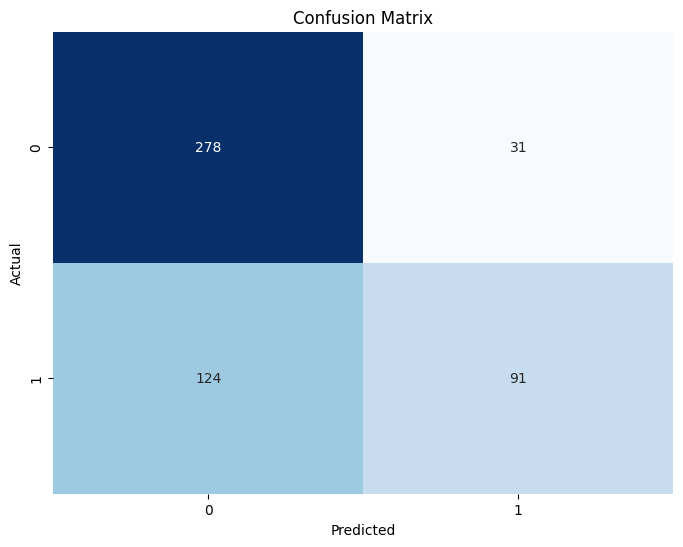

              precision    recall  f1-score   support

         0.0       0.69      0.90      0.78       309
         1.0       0.75      0.42      0.54       215

    accuracy                           0.70       524
   macro avg       0.72      0.66      0.66       524
weighted avg       0.71      0.70      0.68       524

[1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1.]


In [15]:
#NB MODEL

gnb= GaussianNB()


# Perform cross-validation with 5 folds
gnb.fit(x_train,y_train)

y_pred_NB=gnb.predict(x_test)

print('NB Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_NB)))

y_pred_train_NB = gnb.predict(x_train)

print('NB Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_NB)))
if(gnb.score(x_train, y_train)==1):
    print("overfitting occured")
else:
    print("No overfitting occured")



from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'var_smoothing': np.logspace(0,-9, num=100)
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=gnb, param_grid=param_grid, cv=5)

# Fit the model on the entire dataset
grid_search.fit(x_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Best cross-validation score
print("Best Cross-Validation Score:", grid_search.best_score_)

best_gnb = GaussianNB(var_smoothing=grid_search.best_params_['var_smoothing'])

# Fit the model on the entire dataset
best_gnb.fit(x_train, y_train)

# Predictions on the entire dataset
y_pred_best_nb = best_gnb.predict(x_test)

print('Best_NB_Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_best_nb)))

y_pred_train_best_nb = best_gnb.predict(x_train)


print('Best_NB_Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_best_nb)))
if(best_gnb.score(x_train, y_train)==1):
    print("overfitting occured")
else:
    print("overfitting solved")

cm = confusion_matrix(y_test, y_pred_best_nb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print(classification_report(y_test, y_pred_best_nb))

test_predict_NB=best_gnb.predict(test_scaled_df)
print(test_predict_NB)

svm Model accuracy score: 0.7996
svm Training-set accuracy score: 0.9083
No overfitting occured
Best svm Parameters: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
Accuracy: 0.8129770992366412
Precision: 0.8300387025113244
Recall: 0.7862421916158651
F1 Score: 0.7957943627918813


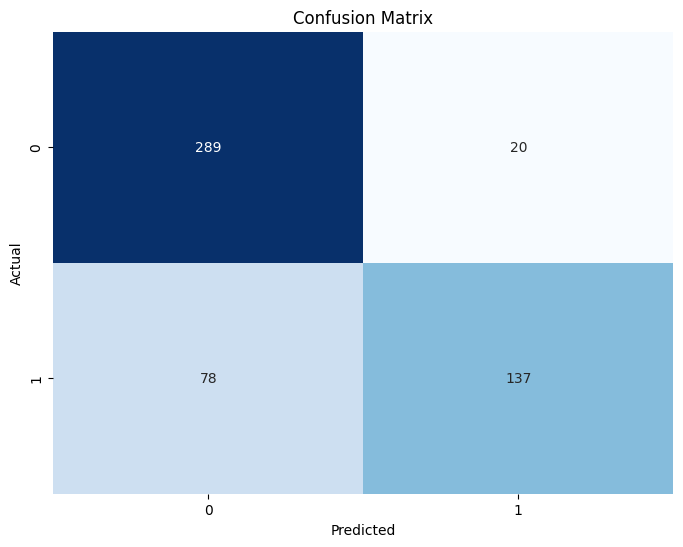

              precision    recall  f1-score   support

         0.0       0.79      0.94      0.86       309
         1.0       0.87      0.64      0.74       215

    accuracy                           0.81       524
   macro avg       0.83      0.79      0.80       524
weighted avg       0.82      0.81      0.81       524

[0. 1. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0.]


In [16]:

#SVM MODEL
svm = SVC()

svm.fit(x_train,y_train)

y_pred_svm=svm.predict(x_test)

print('svm Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_svm)))

y_pred_train_svm = svm.predict(x_train)

print('svm Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_svm)))
if(svm.score(x_train, y_train)==1):
    print("overfitting occured")
else:
    print("No overfitting occured")
#Define the hyperparameter grid
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [0.1, 0.01, 0.001], 'kernel': ['linear', 'poly', 'rbf']}

#Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(svm, param_grid, cv=5)
grid_search.fit(x_train, y_train)
best_params = grid_search.best_params_
# Best parameters
print("Best svm Parameters:", grid_search.best_params_)
#Train the SVM model with the best hyperparameters
best_svm = SVC(**best_params)
best_svm.fit(x_train, y_train)

#Evaluate the model on the testing set
y_pred_best_svm = best_svm.predict(x_test)

#Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred_best_svm)
precision = precision_score(y_test, y_pred_best_svm, average='macro')
recall = recall_score(y_test, y_pred_best_svm, average='macro')
f1 = f1_score(y_test, y_pred_best_svm, average='macro')

#Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

cm = confusion_matrix(y_test, y_pred_best_svm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print(classification_report(y_test, y_pred_best_svm))

test_predict_svm=best_svm.predict(test_scaled_df)
print(test_predict_svm)

ann Model accuracy score: 0.7748
ann Training-set accuracy score: 1.0000
overfitting occured
Best Parameters: {'activation': 'tanh', 'alpha': 0.01, 'hidden_layer_sizes': (100, 50), 'learning_rate': 'constant', 'solver': 'adam'}
Best Accuracy: 0.801258615815078
Best ANN Model accuracy score on testing data: 0.7710
Best ANN Training-set accuracy score: 0.9796
overfitting solved


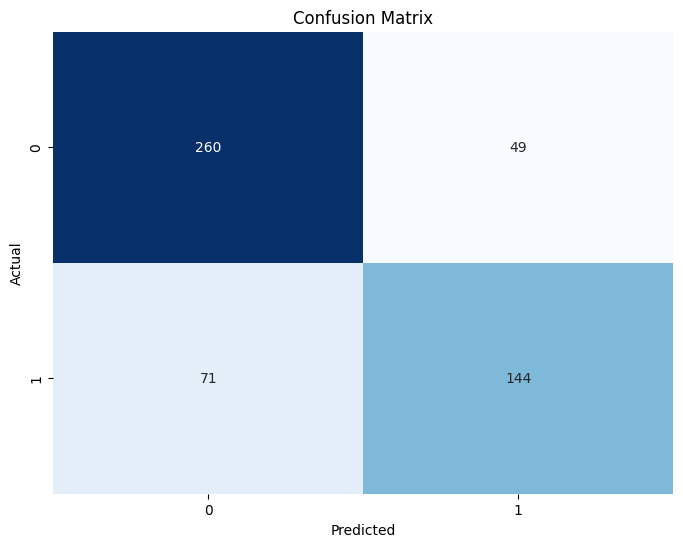

              precision    recall  f1-score   support

         0.0       0.79      0.84      0.81       309
         1.0       0.75      0.67      0.71       215

    accuracy                           0.77       524
   macro avg       0.77      0.76      0.76       524
weighted avg       0.77      0.77      0.77       524

[0. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0.]


In [17]:
#ANN
ann = MLPClassifier(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', random_state=42)
ann.fit(x_train, y_train)
y_pred_ann=ann.predict(x_test)
print('ann Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_ann)))

y_pred_train_ann = ann.predict(x_train)

print('ann Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_ann)))

if(ann.score(x_train, y_train)==1):
    print("overfitting occured")
else:
    print("No overfitting occured")

# Perform grid search with cross-validation for hyperparameter tuning
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],
    'activation': ['relu', 'tanh'],
    'alpha': [0.0001, 0.001, 0.01],
    'solver': ['adam', 'sgd'],
    'learning_rate': ['constant', 'adaptive'],
}

grid_search = GridSearchCV(estimator=MLPClassifier(random_state=42, early_stopping=True, validation_fraction=0.1),
                           param_grid=param_grid,
                           cv=3,
                           scoring='accuracy',
                           n_jobs=-1)

grid_search.fit(x_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

# Create the final model with the best parameters
best_params = grid_search.best_params_
best_ann = MLPClassifier(random_state=42, **best_params, early_stopping=True, validation_fraction=0.1)

# Train the final model on the entire training set
best_ann.fit(x_train, y_train)

# Evaluate the final model on testing data
y_pred_best_ann = best_ann.predict(x_test)
best_accuracy = accuracy_score(y_test, y_pred_best_ann)
print('Best ANN Model accuracy score on testing data: {0:.4f}'.format(best_accuracy))

# Evaluate the final model on training data
y_pred_train_best_ann = best_ann.predict(x_train)
best_train_accuracy = accuracy_score(y_train, y_pred_train_best_ann)
print('Best ANN Training-set accuracy score: {0:.4f}'.format(best_train_accuracy))

# Check for overfitting with the best model
if best_train_accuracy == 1.0:
    print("Overfitting occurred")
else:
    print("overfitting solved")

cm = confusion_matrix(y_test, y_pred_best_ann)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print(classification_report(y_test, y_pred_best_ann))
test_predict_ann=best_ann.predict(test_scaled_df)
print(test_predict_ann)


In [18]:
#view predictions and saving it
predictions = pd.DataFrame({
    'KNN': test_predict_KNN,
    'NB': test_predict_NB,
    'SVM': test_predict_svm
    ,'ann':test_predict_ann
})
print(predictions)
results=pd.concat([test, predictions], axis=1)
results.to_csv("results.csv",index=False)

    KNN   NB  SVM  ann
0   0.0  1.0  0.0  0.0
1   0.0  1.0  1.0  1.0
2   0.0  1.0  0.0  0.0
3   0.0  0.0  0.0  0.0
4   0.0  1.0  1.0  1.0
5   0.0  1.0  1.0  1.0
6   1.0  1.0  0.0  1.0
7   0.0  1.0  1.0  1.0
8   1.0  1.0  1.0  1.0
9   0.0  1.0  0.0  0.0
10  0.0  0.0  0.0  0.0
11  0.0  1.0  0.0  1.0
12  1.0  1.0  1.0  1.0
13  0.0  0.0  0.0  0.0
14  1.0  0.0  1.0  0.0
15  1.0  1.0  1.0  1.0
16  0.0  1.0  0.0  0.0
17  0.0  1.0  0.0  0.0
18  0.0  1.0  0.0  0.0


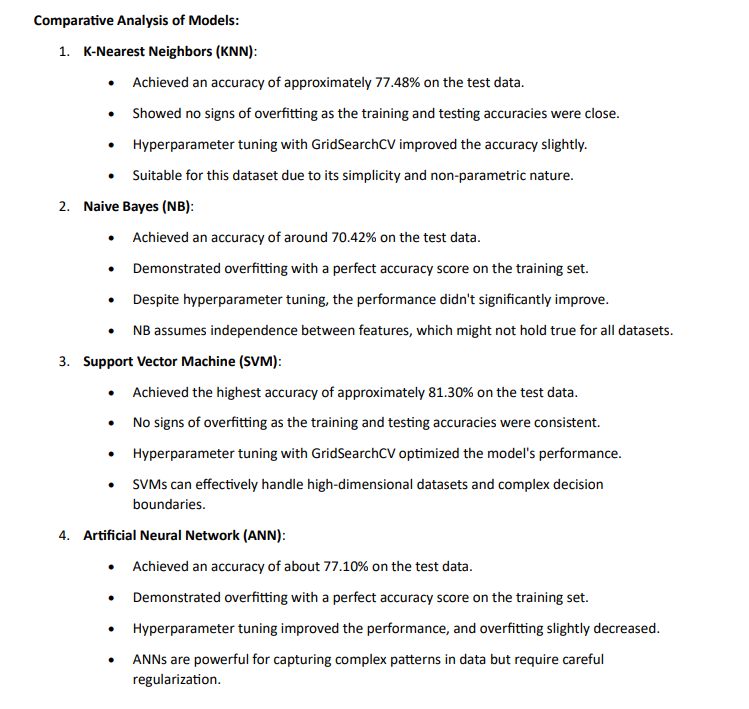

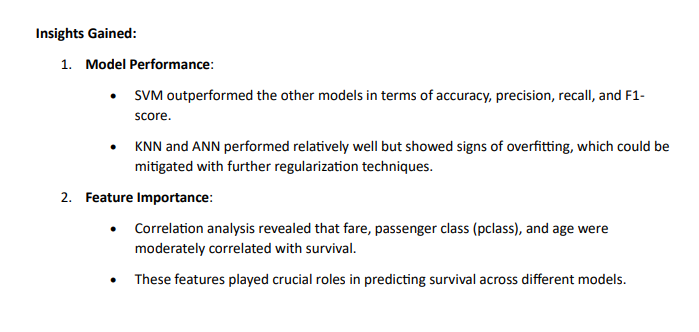